# Preprocessing Notebook
---
Notebook for preprocessing Genepy Scores

In [1]:
from get_data import genepy_df
import pandas as pd
import numpy as np
import os

            A1BG      A1CF       A2M     A2ML1   A3GALT2    A4GALT     A4GNT  \
Samid                                                                          
AP0013  0.213376  0.168596  0.578950  0.000000  0.251588  0.168758  0.317849   
AP0030  0.423495  0.000000  0.145681  0.231687  0.000000  0.128607  0.184796   
AP0045  0.249633  0.000000  0.145681  0.070938  0.000000  0.047297  0.184796   
AP0046  0.423495  0.000000  0.145681  0.333588  0.096853  0.047297  0.184796   
AP0055  0.213376  0.000000  0.221325  0.188007  0.055868  0.047297  0.490579   

            AAAS  AACS     AADAC  ...  ZW10    ZWILCH     ZWINT  ZXDA  \
Samid                             ...                                   
AP0013  0.000000   0.0  0.000000  ...   0.0  0.147379  0.058455   0.0   
AP0030  0.188629   0.0  0.018502  ...   0.0  0.095539  0.058455   0.0   
AP0045  0.000000   0.0  0.391329  ...   0.0  0.000000  0.058455   0.0   
AP0046  0.188629   0.0  0.000000  ...   0.0  0.000000  0.058455   0.0   
A

In [1]:
from binerised import genepy_bin_99, genepy_bin_97_5

ModuleNotFoundError: No module named 'binerised'

In [5]:
import get_data

In [6]:
patient_dgenes = genepy_bin_99.sum(axis=1).sort_values(ascending=False)
patient_dgenes #.rename('total_disease_genes')

Samid
SOAD0280    1490
SOAD0283    1366
SOAD0509    1295
SOPR0291    1259
SOPR0240    1100
            ... 
SOPR0357      88
RL0007        88
SOPR0551      84
PR0069        84
PR0075        83
Length: 1086, dtype: int64

In [7]:
patient_dgenes = genepy_bin_97_5.sum(axis=1).sort_values(ascending=False)
patient_dgenes #.rename('total_disease_genes')

Samid
SOAD0280    2576
SOAD0283    2420
SOPR0291    2338
SOAD0509    2306
SOPR0240    2098
            ... 
SOPR0551     214
SOAD0236     213
SOAD0034     213
PR0131       210
SOPR0357     208
Length: 1086, dtype: int64

In [39]:
get_data.patient_phenotype[get_data.patient_phenotype.index == 'AP0013']['Diagnosis']

IID
AP0013    CD
Name: Diagnosis, dtype: object

In [31]:
genepy_bin_99.sum(axis=0).sort_values(ascending=False)

A1BG        11
RFX5        11
GTPBP6      11
RFXANK      11
RFX8        11
            ..
ZNF677       0
RPS11        0
HSP90AB1     0
ZNF683       0
MAIP1        0
Length: 16794, dtype: int64

In [27]:
genepy_df['ZYX'].sort_values(ascending=False).head(15)

Samid
SOAD0039    2.585178
SOAD0086    2.531930
SOAD0616    2.531930
SOAD0431    2.372489
SOAD0004    2.312618
SORL0040    2.312618
SOAD0152    2.146457
SOAD0601    2.011227
SOPR0240    2.000176
SOAD0508    1.939445
SOPR0452    1.892958
SOPR0291    1.881538
PR0124      1.470259
SOAD0178    1.316227
SOAD0229    1.148869
Name: ZYX, dtype: float64

In [25]:
np.percentile(genepy_df['ZYX'],99)

1.8832512254498797

In [28]:
genepy_bin_99['ZYX'].sort_values(ascending=False).head(15)

Samid
SOAD0616    1
SORL0040    1
SOAD0152    1
SOAD0601    1
SOAD0086    1
SOAD0508    1
SOPR0452    1
SOAD0431    1
SOAD0039    1
SOPR0240    1
SOAD0004    1
AP0013      0
SOAD0577    0
SOAD0578    0
SOAD0575    0
Name: ZYX, dtype: int64

## For binerising scores generating

In [5]:
def binerise_series(X, percent=95):
    arr1 = []
    percentile = np.percentile(X,percent)
    for row in X:
        if row > percentile:
            arr1.append(1)
        else:
            arr1.append(0)
    return arr1



### Genepy Dataframes Binerised

In [6]:
genepy_bin_95 = genepy_df.apply(binerise_series,0)
genepy_bin_99 = genepy_df.apply(binerise_series,0,percent=99)

In [7]:
genepy_bin_80 = genepy_df.apply(binerise_series,0,percent=80)

### CD and UC subsets binerised

In [8]:
import get_data
CD_bin_95 = get_data.get_diagnosis_df(genepy_bin_95, 'CD')
UC_bin_95 = get_data.get_diagnosis_df(genepy_bin_95, 'UC')

CD_bin_99 = get_data.get_diagnosis_df(genepy_bin_99, 'CD')
UC_bin_99 = get_data.get_diagnosis_df(genepy_bin_99, 'UC')

In [9]:
CD_bin_80 = get_data.get_diagnosis_df(genepy_bin_80, 'CD')
UC_bin_80 = get_data.get_diagnosis_df(genepy_bin_80, 'UC')


In [10]:
SOAD0511 = CD_bin_95.loc['SOAD0511',:]
SOAD0511_80 = CD_bin_80.loc['SOAD0511',:]
SOAD0511[SOAD0511>0].to_csv('SOAD0511_95.csv')

In [14]:
SOAD0511_99 = CD_bin_99.loc['SOAD0511',:]
SOAD0511_99[SOAD0511_99>0].to_csv('SOAD0511_99.csv')

In [8]:
print("Number of patients with NOD2 with top 5%: " + str(genepy_bin_95['NOD2'].sum()))
print("Number of patients with NOD2 with top 1%: " + str(genepy_bin_99['NOD2'].sum()))

print("Number of patients with NOD2 with top 5% that are CD: " + str(CD_bin_95['NOD2'].sum()))
print("Number of patients with NOD2 with top 5% that are UC: " + str(UC_bin_95['NOD2'].sum()))

print("Number of patients with NOD2 with top 1% that are CD: " + str(CD_bin_99['NOD2'].sum()))
print("Number of patients with NOD2 with top 1% that are UC: " + str(UC_bin_99['NOD2'].sum()))

Number of patients with NOD2 with top 5%: 54
Number of patients with NOD2 with top 1%: 11
Number of patients with NOD2 with top 5% that are CD: 47
Number of patients with NOD2 with top 5% that are UC: 6
Number of patients with NOD2 with top 1% that are CD: 10
Number of patients with NOD2 with top 1% that are UC: 1


In [34]:
genepy_bin_95.sum()[genepy_bin_95.sum()<1086].sort_values(ascending=False).head(40)

SyntaxError: unexpected EOF while parsing (2926274938.py, line 1)

In [38]:
genepy_bin_95.sum().sort_values(ascending=False).head(50)

PAPPA2       55
TNFRSF21     55
PRAM1        55
TNFRSF1A     55
C12orf56     55
GFAP         55
RFX1         55
GEN1         55
TNFRSF4      55
PRDM15       55
ZNF169       55
TNIK         55
SF3B1        55
GCN1         55
TNN          55
RFTN2        55
GGCX         55
GGH          55
GGT6         55
SFI1         55
GIMD1        55
C11orf94     55
GJB5         55
TNFAIP2      55
TNC          55
C11orf54     55
GLB1L2       55
GLB1L3       55
GLCE         55
GLDC         55
GLIS1        55
GLIS3        55
GLOD4        55
GCKR         55
TNNI2        55
POSTN        55
GAD2         55
GAK          55
TNS1         55
SEZ6L        55
TNS2         55
C19orf81     55
TNS3         55
C1GALT1C1    55
GC           55
GABRB1       55
SETX         55
ZNF114       55
GAA          55
PREX2        55
dtype: int64

In [51]:
print(np.percentile(genepy_df['NOD2'],99))

genepy_df['NOD2'].sort_values(ascending=False).head(600)

4.383404188329179


Samid
SOPR0401    7.473334
SORL0032    6.164264
SOPR0393    5.760331
SOPR0356    5.220091
PR0074      5.178640
              ...   
SOAD0163    1.133014
SOPR0449    1.133014
PR0058      1.133014
SOAD0378    1.133014
SOAD0583    1.133014
Name: NOD2, Length: 600, dtype: float64

In [52]:
genepy_bin_95.loc['SOAD0367'].sort_values(ascending=False).head(20)

CTPS2       1
RARG        1
ROS1        1
LIPH        1
CFLAR       1
CFP         1
INS-IGF2    1
FAM3B       1
OR5D14      1
CGN         1
KIAA2012    1
DPF3        1
ROCK1       1
VSTM5       1
MC5R        1
SKOR1       1
CAMSAP1     1
TMPRSS4     1
ZNF276      1
INPP5B      1
Name: SOAD0367, dtype: int64

### CD and UC subset to CSV


In [ ]:
## Raw genepy scores
CD_genepy = get_data.get_diagnosis_df(genepy_df, 'CD')
CD_genepy.T.to_csv("../Data/CD_genepy.csv")
UC_genepy = get_data.get_diagnosis_df(genepy_df, 'UC')
UC_genepy.T.to_csv("../Data/UC_genepy.csv")

In [45]:
## Binerised scores
CD_bin_95.T.to_csv("../Data/CD_bin_95.txt", sep='\t')
UC_bin_95.T.to_csv("../Data/UC_bin_95.txt", sep='\t')

In [52]:
# series of top scores 
CD_bin_95_sum = CD_bin_95.sum().sort_values(ascending=False)
UC_bin_95_sum = UC_bin_95.sum().sort_values(ascending=False)

CD_bin_99_sum = CD_bin_99.sum().sort_values(ascending=False)
UC_bin_99_sum = UC_bin_99.sum().sort_values(ascending=False)


## Remove any 0 values - still like 16000
CD_bin_95_sum[CD_bin_95_sum>0]
UC_bin_95_sum[UC_bin_95_sum>0]

CD_bin_95_sum.head(120)

In [19]:
CD_bin_80.sum().sort_values(ascending=False).head(30)

NOD2         165
OTOGL        156
ZNF80        155
ACSM6        155
HUNK         153
SIPA1L3      152
MGAT4C       151
MICAL2       151
GALNT18      151
ADAMTS14     150
PIEZO2       150
ARHGEF10L    150
EML6         150
FAM114A1     150
THSD7B       149
CHD5         149
ACADM        149
TNS2         149
CETN3        149
GPR151       149
NT5DC3       149
PLIN4        149
ALMS1        149
ZC3H4        149
SDCBP2       149
PCLO         149
COL9A3       148
ANXA1        148
MRO          148
GLP2R        148
dtype: int64

In [46]:
CD_bin_95_sum.to_csv("../Data/CD_bin_95_sum.txt", sep='\t')
UC_bin_95_sum.to_csv("../Data/UC_bin_95_sum.txt",sep='\t')

## Plots

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc = {'figure.figsize':(40,30)})

def pathway_genes(file):
    my_file = open(file, "r")
    data = my_file.read()
    data_list = data.split("\n")
    return(data_list)

<AxesSubplot:xlabel='IID'>

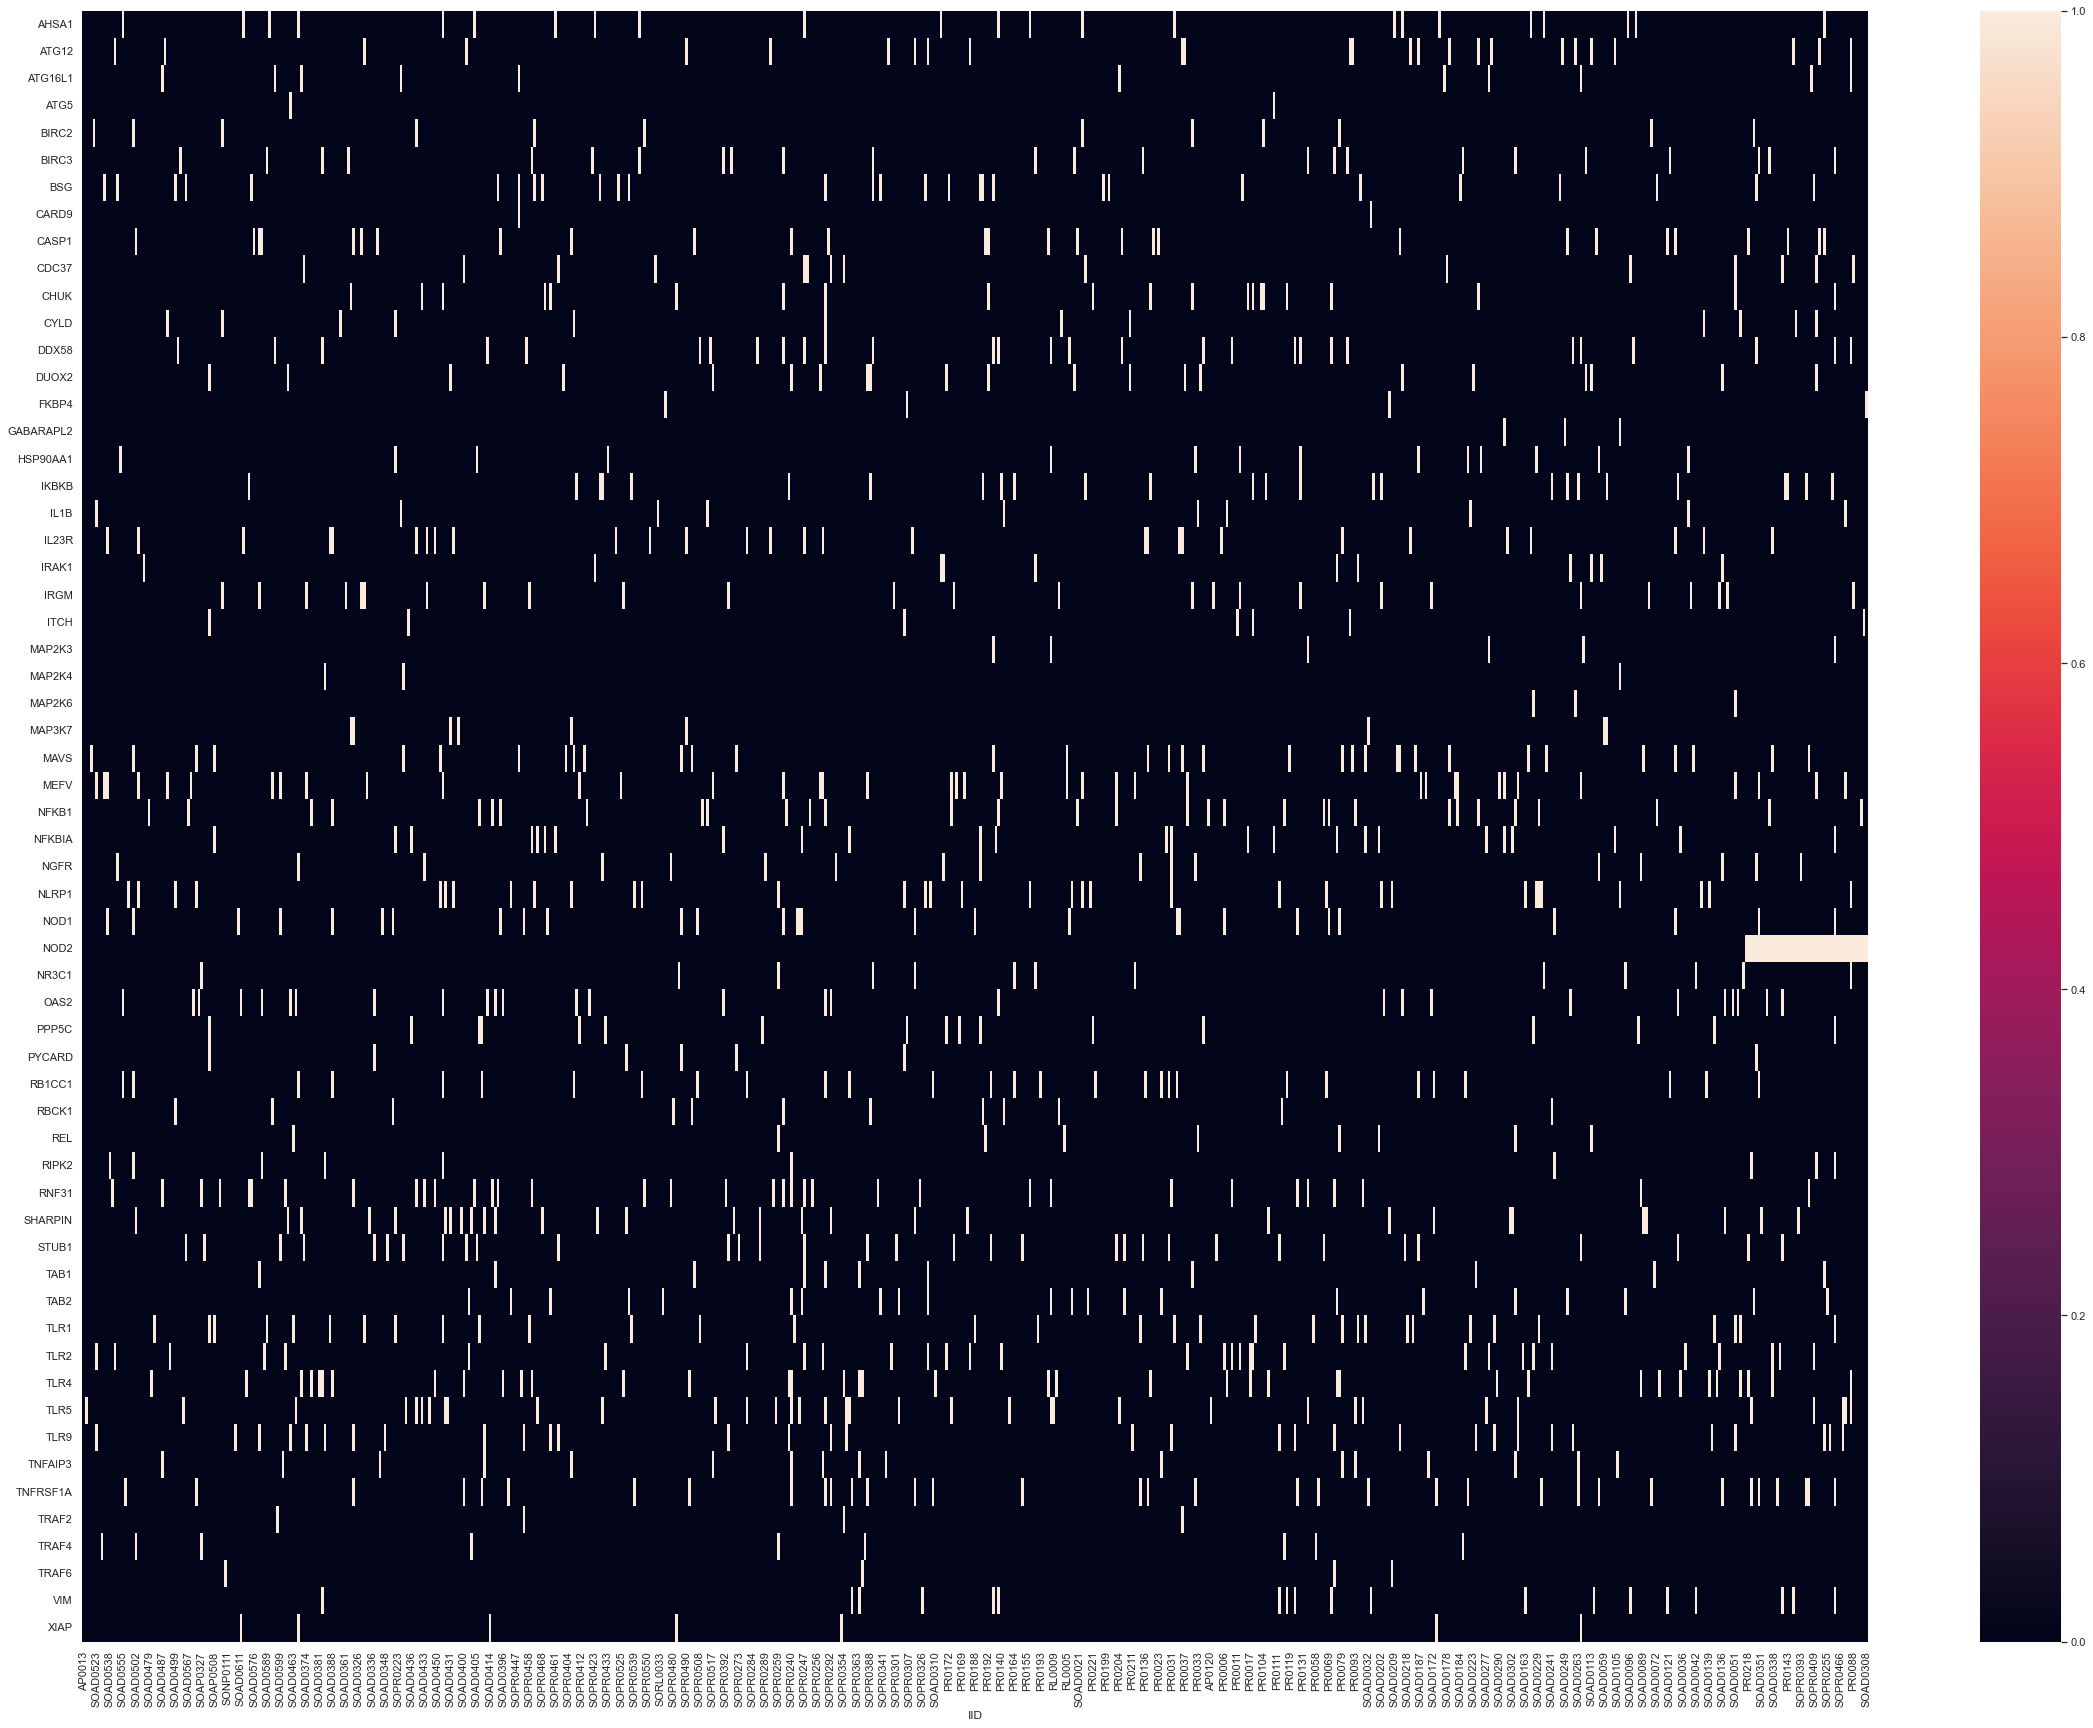

In [69]:
sorted_sub = CD_bin_95.sort_values(by=['NOD2'])

NOD2_ass = pathway_genes("../Data/NOD2_associated.txt")
sub_NOD2 = sorted_sub.loc[:, sorted_sub.columns.isin(NOD2_ass)]

sns.heatmap(sub_NOD2.transpose())


In [70]:
genepy_df.to_csv("../Data/genepy.csv")

In [72]:
from get_data import genepy_normalized, genepy_norm_loeuf
genepy_bin_95.to_csv("../R/genepy_bin_95.csv")
genepy_bin_99.to_csv("../R/genepy_bin_99.csv")
genepy_normalized.to_csv("../R/genepy_normalised.csv")
genepy_norm_loeuf.to_csv("../R/genepy_norm_loeuf.csv")

## testing

In [51]:
import get_data

genepy_bin_95 = get_data.binerise_genepy(percent=95)
genepy_bin_97_5 = get_data.binerise_genepy(percent=97.5)
genepy_bin_99 = get_data.binerise_genepy(percent=99)

In [2]:
CD_bin_95 = get_data.get_diagnosis_df(genepy_bin_95, 'CD')
UC_bin_95 = get_data.get_diagnosis_df(genepy_bin_95, 'UC')

CD_bin_97_5 = get_data.get_diagnosis_df(genepy_bin_97_5, 'CD')
UC_bin_97_5 = get_data.get_diagnosis_df(genepy_bin_97_5, 'UC')

CD_bin_99 = get_data.get_diagnosis_df(genepy_bin_99, 'CD')
UC_bin_99 = get_data.get_diagnosis_df(genepy_bin_99, 'UC')

In [19]:
def get_matching_UC(CD_matrix, UC_matrix):
    '''
    return matching UC genes
    '''
    return(UC_matrix[CD_matrix.sum().sort_values(ascending=False).head(30).index].sum())
CD_bin_95.sum().sort_values(ascending=False).head(30)

NOD2        47
CFAP58      47
ATP7B       45
CRYBG2      45
PDZD7       45
CFAP44      44
TMPRSS6     44
ALG8        44
COL15A1     43
USP53       43
B4GALNT2    43
ACTN4       43
CCDC183     43
THBS2       43
ADAM8       43
MRC1        43
NIPBL       43
FLT1        43
CRB2        43
CAPN10      43
AP3D1       43
PTPRQ       42
BOP1        42
FNDC3B      42
TSPAN9      42
GPAM        42
ERICH6B     42
COG6        42
CD207       42
COL5A3      42
dtype: int64

In [24]:
get_matching_UC(CD_bin_95,UC_bin_95)

def get_matching_as_datafrane(CD_matrix, UC_matrix):
    CD_series = CD_matrix.sum().sort_values(ascending=False).head(30).rename("CD_Cohort")
    UC_series = get_matching_UC(CD_matrix,UC_matrix).rename("UC_Cohort")
    return(pd.merge(CD_series, UC_series,left_index=True,right_index=True))

get_matching_as_datafrane(CD_bin_95,UC_bin_95)
get_matching_as_datafrane(CD_bin_99,UC_bin_99)

,CD_Cohort,UC_Cohort
A1BG,11,0
TTLL10,11,0
TPGS1,11,0
TNIK,11,0
ARMC5,11,0
EIF2AK4,11,0
ASB6,11,0
TECTA,11,0
DRP2,11,0
MAML1,11,0


In [16]:
UC_bin_99[CD_bin_99.sum().sort_values(ascending=False).head(30).index].sum()

A1BG        0
TTLL10      0
TPGS1       0
TNIK        0
ARMC5       0
EIF2AK4     0
ASB6        0
TECTA       0
DRP2        0
MAML1       0
DLD         0
MIR4293     0
MN1         0
SLITRK1     0
CSRNP2      0
SLC25A26    0
SLAIN1      0
OR4X1       0
PAN3        0
ACCSL       0
PDZD7       0
PHLPP1      0
ZNF35       0
RGMB        0
CFAP69      0
ZNF470      0
POMGNT1     0
TRIM62      0
MTFMT       0
HDAC7       0
dtype: int64

In [32]:
def get_as_percentage(matrix, cohort):
    top_series = get_top_bin_sum(matrix)
    if cohort == 'CD':
        return((top_series/681)*100)
    elif cohort == 'UC':
        return((top_series/368)*100)
    else:
        return(print("incorrect cohort value, please use 'CD' or 'UC'"))
    return

get_as_percentage(CD_bin_95, cohort="CD")

NOD2        6.901615
CFAP58      6.901615
ATP7B       6.607930
CRYBG2      6.607930
PDZD7       6.607930
CFAP44      6.461087
TMPRSS6     6.461087
ALG8        6.461087
COL15A1     6.314244
USP53       6.314244
B4GALNT2    6.314244
ACTN4       6.314244
CCDC183     6.314244
THBS2       6.314244
ADAM8       6.314244
MRC1        6.314244
NIPBL       6.314244
FLT1        6.314244
CRB2        6.314244
CAPN10      6.314244
AP3D1       6.314244
PTPRQ       6.167401
BOP1        6.167401
FNDC3B      6.167401
TSPAN9      6.167401
GPAM        6.167401
ERICH6B     6.167401
COG6        6.167401
CD207       6.167401
COL5A3      6.167401
dtype: float64

In [4]:
from binerised import get_matching_as_df_percentage


get_matching_as_df_percentage(CD_bin_99, UC_bin_99)

,CD_Cohort,UC_Cohort
A1BG,1.615272,0.0
TTLL10,1.615272,0.0
TPGS1,1.615272,0.0
TNIK,1.615272,0.0
ARMC5,1.615272,0.0
EIF2AK4,1.615272,0.0
ASB6,1.615272,0.0
TECTA,1.615272,0.0
DRP2,1.615272,0.0
MAML1,1.615272,0.0


In [52]:
import get_data
CD_bin_95 = get_data.get_diagnosis_df(genepy_bin_95, 'CD')
UC_bin_95 = get_data.get_diagnosis_df(genepy_bin_95, 'UC')

CD_bin_97_5 = get_data.get_diagnosis_df(genepy_bin_97_5, 'CD')
UC_bin_97_5 = get_data.get_diagnosis_df(genepy_bin_97_5, 'UC')

CD_bin_99 = get_data.get_diagnosis_df(genepy_bin_99, 'CD')
UC_bin_99 = get_data.get_diagnosis_df(genepy_bin_99, 'UC')

In [58]:
import binerised

CD97In = binerised.get_top_bin_sum(CD_bin_97_5, 20).index
UC97In = binerised.get_top_bin_sum(UC_bin_97_5, 20).index

CD99In = binerised.get_top_bin_sum(CD_bin_99, 20).index
UC99In = binerised.get_top_bin_sum(UC_bin_99, 20).index

In [48]:
def write_to_txt(genes, file_name):
    with open(file_name+'genes.txt', 'w') as file_handler:
        for item in genes:
            file_handler.write("{}\n".format(item))


In [59]:
write_to_txt(CD97In, 'CD97_20')
write_to_txt(UC97In, 'UC97_20')

write_to_txt(CD99In, 'CD99_20')
write_to_txt(UC99In, 'UC99_20')

In [ ]:
.sum().sort_values(ascending=False)

return all '1 genes' for a patient 

In [ ]:
import get_patient
get_genes_above_zero(genepy_bin_99, )

## Other 
---

In [43]:
G = genepy_df['NOD2']
G[1] = 1
G[2] = 0
G[2]

0.0

In [74]:
def fun2(df, col, row):  
    X = df[col]
    percentile = np.percentile(X,95)
    
    for row in X:
        if row >= percentile:
            return 1
        else:
            return 0

In [75]:
fun2(genepy_df, 'NOD2', 24)

0

TypeError: list indices must be integers or slices, not str

In [26]:
alpha = [chr(i) for i in range(ord('a'),ord('z')+1)]
alpha_r = alpha[::-1]
alpha_r

string = "hello My name is!"
retur = ""
for i in string:
    if i in alpha:
        retur += alpha_r[alpha.index(i)]
    else:
        retur += i
    

In [27]:
retur

'svool Mb mznv rh!'